<a href="https://colab.research.google.com/github/f247805/DeepLearning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxDataScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_csv('/content/content/data_date.csv')



In [ ]:
# Extract relevant columns
data = df[['Date', 'Country', 'AQI Value']]


DateNew = pd.to_datetime(data['Date']).copy()


new_data = data.copy()
new_data['Date'] = DateNew

new_data.set_index('Date', inplace=True)

In [ ]:

# Drop non-numeric columns
DataNew = data.drop(['Date', 'Country'], axis=1)
DataScaler = MinMaxScaler()
DataNew = data.drop(['Date', 'Country'], axis=1)

Epoch 1/50
2/2 [==============================] - 2s 426ms/step - loss: 0.0775 - mae: 0.1967 - val_loss: 0.0163 - val_mae: 0.1170
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 0.0697 - mae: 0.1795 - val_loss: 0.0125 - val_mae: 0.1033
Epoch 3/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0632 - mae: 0.1639 - val_loss: 0.0094 - val_mae: 0.0900
Epoch 4/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0570 - mae: 0.1493 - val_loss: 0.0068 - val_mae: 0.0770
Epoch 5/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0525 - mae: 0.1357 - val_loss: 0.0048 - val_mae: 0.0635
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0480 - mae: 0.1227 - val_loss: 0.0033 - val_mae: 0.0500
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0440 - mae: 0.1095 - val_loss: 0.0023 - val_mae: 0.0396
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0399 - mae: 0.0965 - va

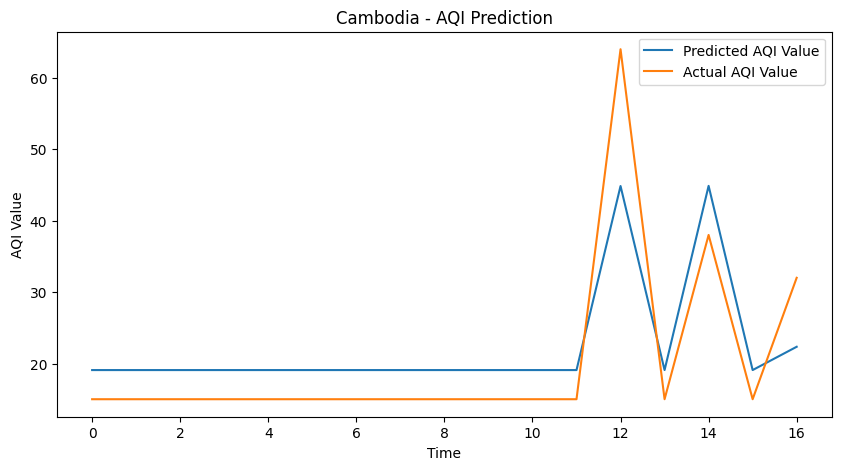

Epoch 1/50
2/2 [==============================] - 2s 310ms/step - loss: 0.3029 - mae: 0.4595 - val_loss: 0.1930 - val_mae: 0.3875
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2886 - mae: 0.4466 - val_loss: 0.1832 - val_mae: 0.3773
Epoch 3/50
2/2 [==============================] - 0s 38ms/step - loss: 0.2755 - mae: 0.4339 - val_loss: 0.1738 - val_mae: 0.3672
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.2629 - mae: 0.4227 - val_loss: 0.1647 - val_mae: 0.3570
Epoch 5/50
2/2 [==============================] - 0s 43ms/step - loss: 0.2517 - mae: 0.4119 - val_loss: 0.1557 - val_mae: 0.3467
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 0.2401 - mae: 0.4014 - val_loss: 0.1467 - val_mae: 0.3358
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2278 - mae: 0.3905 - val_loss: 0.1376 - val_mae: 0.3243
Epoch 8/50
2/2 [==============================] - 0s 54ms/step - loss: 0.2172 - mae: 0.3806 - va

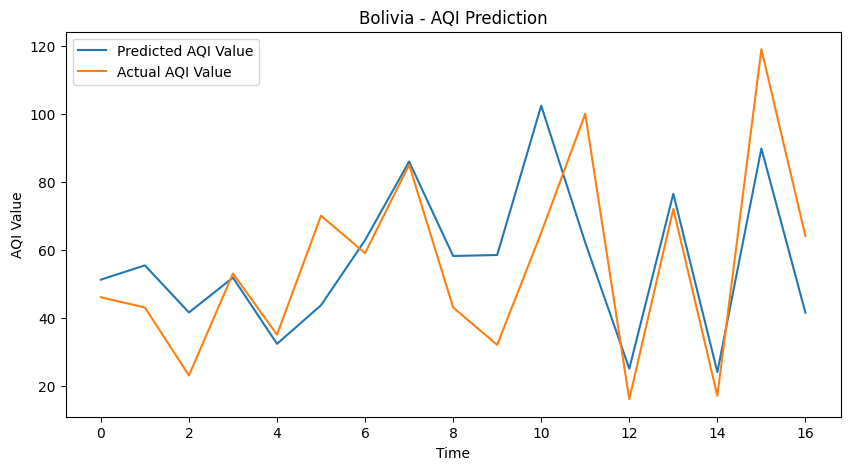

In [ ]:
for country in ['Cambodia', 'Bolivia']:
    country_data = data[data['Country'] == country]

    DataScaler = MinMaxScaler()
    country_data['AQI Value'] = DataScaler.fit_transform(country_data[['AQI Value']])

    See_Back = 10
    X, y = [], []
    for i in range(len(country_data) - See_Back):
        X.append(country_data['AQI Value'].values[i:(i + See_Back)])
        y.append(country_data['AQI Value'].values[i + See_Back])

    X, y = np.array(X), np.array(y)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(units=50, activation='relu', input_shape=(See_Back, 1)),
        tf.keras.layers.Dense(units=1)
    ])

   #model compling here
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    #$traing the model here
    ModelFitting = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


    loss, mae = model.evaluate(X_test, y_test)

    #Making the predictions
    predictions = model.predict(X_test)
    predictions_inv = DataScaler.inverse_transform(predictions)
    y_test = y_test.reshape(-1, 1)
    y_test_inv = DataScaler.inverse_transform(y_test)

    # Visualizing
    plt.figure(figsize=(10, 5))
    plt.plot(predictions_inv, label='Predicted AQI Value')
    plt.plot(y_test_inv, label='Actual AQI Value')
    plt.xlabel('Time')
    plt.ylabel('AQI Value')
    plt.title(f'{country} - AQI Prediction')
    plt.legend()
    plt.show()